# Tooploox Data Science exercise

In [1]:
import pandas as pd

dataset = pd.read_csv('./data.csv', header=None)

dataset.loc[[408]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
408,341163402640457_909732239116901,50422,99415,149658,159470,208229,243056,264071,282686,302224,334561,380991,440064,508624,588427,685909,786161,887910,992869,1104132,...


### Analysing basic statistics for v(24), v(72), v(168)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in [24,72,168]:
    print "For %d-th hour: mean = %f, std = %f, median = %d" % (i, dataset[i].mean(), dataset[i].std(), dataset[i].median())

For 24-th hour: mean = 376765.517467, std = 923646.739985, median = 194357
For 72-th hour: mean = 613303.341703, std = 1653969.423316, median = 237417
For 168-th hour: mean = 743209.837336, std = 2007963.831213, median = 252287


### Plotting the distribution of v(168)

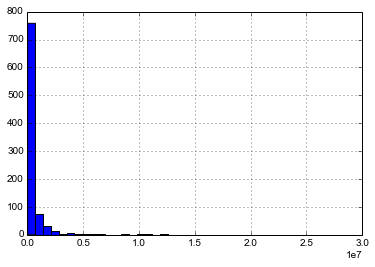

In [3]:
dataset[168].hist(bins = 40)

### Plotting the log-transformed distribution of v(168)

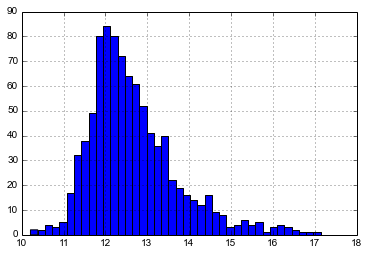

In [4]:
log_168 = dataset[168].apply(lambda x: np.log(x))
log_168.hist(bins = 40)

### Deleting outliers

In [5]:
std_168 = log_168.std()
mean_168 = log_168.mean()

selector = np.abs(log_168 - mean_168) < 3 * std_168

print dataset.shape
dataset = dataset.loc[selector]
print dataset.shape

dataset.iloc[[408]]

(916, 169)
(901, 169)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
414,341163402640457_910191479070977,27919,42325,52531,59395,64812,70973,76102,77662,77662,86279,93326,97206,100377,103153,105241,107328,108932,110263,111263,...


### Computing correlation coefficients between v(n) for n = 1, 2, ..., 24 and v(168).

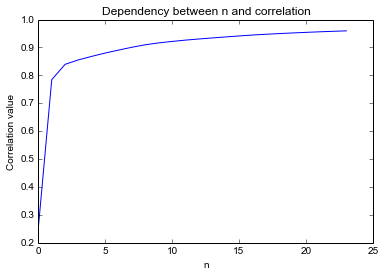

In [6]:
range_1_24 = range(1,25,1)

def log_transform(x):
    x[x==0] = 1
    return np.log(x)

correlations = dataset[range_1_24].apply(lambda x: np.log(x+1)).apply(lambda x: log_168.corr(x))
correlations

plt.plot(correlations, label='Correlation')
plt.xlabel('n')
plt.ylabel('Correlation value')
plt.title('Dependency between n and correlation')


### Train - test split on log-transformed data

In [7]:
range_for_log_transform = range(1, dataset.shape[1])
dataset[range_for_log_transform] = dataset[range_for_log_transform].apply(lambda x: np.log(x+1))

train_test_permutation = np.random.permutation(dataset.shape[0])
split_index = int(0.1 * dataset.shape[0])

test_indices = train_test_permutation[:split_index]
train_indices = train_test_permutation[split_index:]

test, train = dataset.iloc[test_indices], dataset.iloc[train_indices]

### Training linear models based on only one row

In [8]:
from sklearn.linear_model import LinearRegression

list_of_models = [LinearRegression() for x in xrange(24)]

for i in xrange(24):
    list_of_models[i].fit(train[i+1].reshape(-1,1), train[168])

ValueError: invalid literal for float(): 341163402640457_891841824239276